**Specific Question to ask about the data:**
can player demographics and play-behaviour (total playtime, player age, experience, gender) predict whether a player subscribes to the newsletter?

In [1]:
getwd()

[1] "/home/jovyan/work/swaggest-pino"

In [2]:
list.files()

[1] "Figuring it out.ipynb"       "Individual Planning Project"
[3] "loadingstuff.ipynb"          "players.csv"                
[5] "README.md"                   "sessions.csv"               
[7] "Untitled.ipynb"

In [18]:
library(tidyverse)
players_original <- read_csv("players.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
print(players_original, rows = 10)

# A tibble: 196 × 7
   experience subscribe hashedEmail              played_hours name  gender   Age
   <chr>      <lgl>     <chr>                           <dbl> <chr> <chr>  <dbl>
 1 Pro        TRUE      f6daba428a5e19a3d475748…         30.3 Morg… Male       9
 2 Veteran    TRUE      f3c813577c458ba0dfef809…          3.8 Chri… Male      17
 3 Veteran    FALSE     b674dd7ee0d24096d1c0196…          0   Blake Male      17
 4 Amateur    TRUE      23fe711e0e3b77f1da7aa22…          0.7 Flora Female    21
 5 Regular    TRUE      7dc01f10bf20671ecfccdac…          0.1 Kylie Male      21
 6 Amateur    TRUE      f58aad5996a435f16b0284a…          0   Adri… Female    17
 7 Regular    TRUE      8e594b8953193b26f498db9…          0   Luna  Female    19
 8 Amateur    FALSE     1d2371d8a35c8831034b25b…          0   Emer… Male      21
 9 Amateur    TRUE      8b71f4d66a38389b7528bb3…          0.1 Nata… Male      47
10 Veteran    TRUE      bbe2d83de678f519c4b3daa…          0   Nyla  Female    22
# ℹ 186 

In [5]:
players_original <- tibble(players_original)

In [6]:
player_data <- players_original |>
    select(experience, subscribe, played_hours, gender, Age)
player_data

experience,subscribe,played_hours,gender,Age
<chr>,<lgl>,<dbl>,<chr>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Veteran,FALSE,0.0,Male,17
Amateur,TRUE,0.7,Female,21
Regular,TRUE,0.1,Male,21
Amateur,TRUE,0.0,Female,17
Regular,TRUE,0.0,Female,19
Amateur,FALSE,0.0,Male,21
Amateur,TRUE,0.1,Male,47


In [7]:
set.seed(42)
library(rsample)
library(tidymodels)

player_split <- initial_split(player_data, prop = 0.70)
player_training <- training(player_split) |>
    mutate(subscribe = as.factor(subscribe))
player_testing <- testing(player_split) |>
    mutate(subscribe = as.factor(subscribe))

player_training

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.



experience,subscribe,played_hours,gender,Age
<chr>,<fct>,<dbl>,<chr>,<dbl>
Veteran,TRUE,12.5,Agender,27
Amateur,TRUE,0.1,Male,23
Beginner,TRUE,0.2,Prefer not to say,17
Veteran,TRUE,0.0,Male,22
Veteran,FALSE,0.1,Male,19
Beginner,TRUE,0.1,Male,24
Pro,TRUE,0.2,Other,NA
Amateur,TRUE,0.0,Male,21
Veteran,TRUE,0.1,Male,17


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


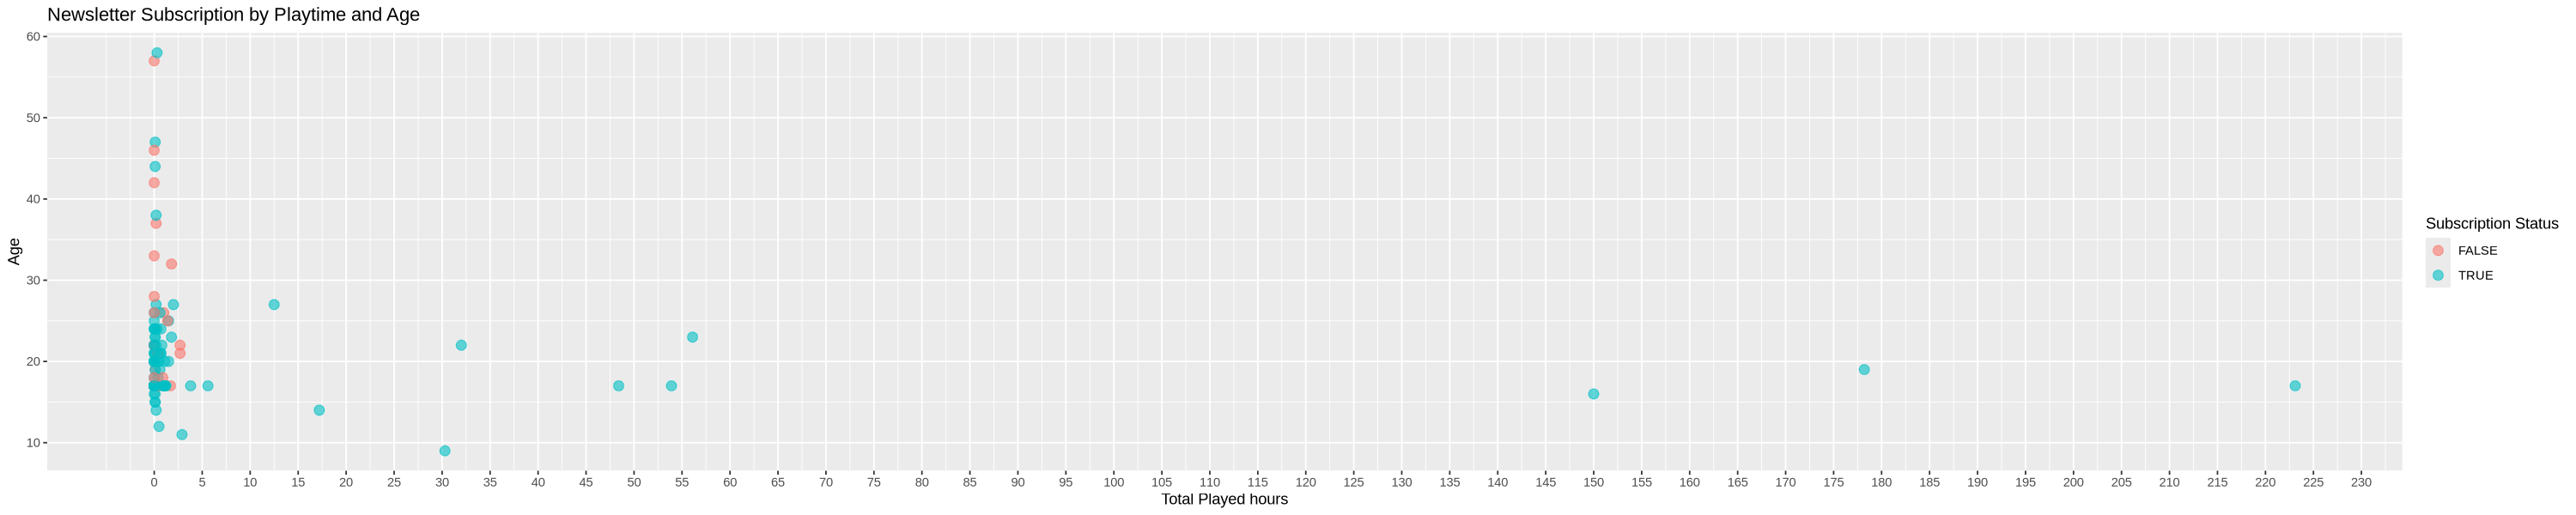

In [16]:
library(ggplot2)
options(repr.plot.width = 25, repr.plot.height = 5)

age_and_played_time <- ggplot(player_training, aes(x=played_hours, y= Age, color = subscribe)) +
    geom_point(alpha = 0.6, size = 3) +
    labs(title = "Newsletter Subscription by Playtime and Age",
         x = "Total Played hours",
         y = "Age",
         color = "Subscription Status") 

age_and_played_time + 
    scale_x_continuous(breaks = seq(0,1000, by = 5))

Notes: 
- when total playtime is around 3 hours or more, players tend to subscribe to the newsletter
- despite low playtime (<2.5 hours), players between the ages of roughly 12-38 show a relatively high subscription rate

Conclude that:
- Older players are generally less likely to subscribe to the newsletter
- Increased playtime is associated with a higher chance of newletter subscription

This plot suggests a positive relationship between total playtime and likelihood of subscription. However, age appears t. have a negative association with subscription lieklihoood, particularly among older players 

ERROR: Error in played_hours: The pipe operator requires a function call as RHS (<text>:1:28)
